# Source Code and outputs for Problem 4.3_Hw4_CSE 250A_Fall 2022

In [1]:
# part a. solution

import math


# loading the vocabulary list as a dictionary with the line numbers in the text file 'Vocab' as keys
v=1
vocablist=[]
with open('hw4_vocab.txt') as f:
    for line in f:
        vocablist.append(v)
        vocablist.append(line.strip())
        v=v+1

def Convertlisttodic(lst):     # function to convert a list to dictionary
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct
 
vocabdictwlinekey=Convertlisttodic(vocablist) # creates a dictionary from vocab file with keys as line numbers and words as values 


# loading the unigram counts as a dictionary with the line numbers in the text file as keys

v=1
vocabunigramlist=[]
with open('hw4_unigram.txt') as f:
    for line in f:
        vocabunigramlist.append(v)
        vocabunigramlist.append(int(line.strip()))  #takes the counts as integer values 
        v=v+1

unigmdictlinekey=Convertlisttodic(vocabunigramlist) # creates a dictionary from the text file with keys as line numbers and unigram counts as values 


# computing unigram probabilities: 
s=sum(unigmdictlinekey.values())    # total count of all the words 
probdict={key: value / s for key, value in unigmdictlinekey.items()}   
# the last line above creates probabilities/ML estimates from unigram count


# computing maximum log likelihood = Sum over Count(X=x)*log(Unigram probability of X=x) for unigram
maxlikelihoodunigram=0
for key, value in unigmdictlinekey.items():
    maxlikelihoodunigram=maxlikelihoodunigram+ value*probdict[key]
    
print(f"Maximum log Likelihood estimate for the unigram distribution is {maxlikelihoodunigram}\n\n")

print(f"Below we print all the words starting with letter M and their numerical unigram probabilities:")
    
# printing the table of words that start with 'M' along with their numerical probabilities
for key, value in vocabdictwlinekey.items():
    if value[0]=='M':
        print(f"The word is {value} with P_u({value})= {probdict[key]} \n")


Maximum log Likelihood estimate for the unigram distribution is 8702875.844317213


Below we print all the words starting with letter M and their numerical unigram probabilities:
The word is MILLION with P_u(MILLION)= 0.002072759168154815 

The word is MORE with P_u(MORE)= 0.0017088989966186725 

The word is MR. with P_u(MR.)= 0.0014416083492816956 

The word is MOST with P_u(MOST)= 0.0007879173033190295 

The word is MARKET with P_u(MARKET)= 0.0007803712804681068 

The word is MAY with P_u(MAY)= 0.0007298973156289532 

The word is M. with P_u(M.)= 0.0007034067394618568 

The word is MANY with P_u(MANY)= 0.0006967290595970209 

The word is MADE with P_u(MADE)= 0.0005598610827336895 

The word is MUCH with P_u(MUCH)= 0.0005145971758110562 

The word is MAKE with P_u(MAKE)= 0.0005144626437991272 

The word is MONTH with P_u(MONTH)= 0.00044490959363187093 

The word is MONEY with P_u(MONEY)= 0.00043710673693999306 

The word is MONTHS with P_u(MONTHS)= 0.0004057607781605526 

The word is 

In [2]:
# part b. solution: Calculating bigram probabilities P_{ML}(w'|w)= count (w comes before w')/count(w)

import math
import pandas as pd
import numpy as np

# loading the vocabulary list as a dictionary with the line numbers in the text file 'Vocab' as keys
v=1
vocablist=[]
with open('hw4_vocab.txt') as f:
    for line in f:
        vocablist.append(v)
        vocablist.append(line.strip())
        v=v+1

def Convertlisttodic(lst):     # function to convert a list to dictionary
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct
 
vocabdictwlinekey=Convertlisttodic(vocablist) # creates a dictionary from vocab file with keys as line numbers and words as values 

# loading the bigram counts as an array : 1st column values in the array are indices for words that appear first 
# and 2nd column values in the array are indices for words that appear next. 3rd column values are numbers of such occurrences

X = pd.read_csv('hw4_bigram.txt', sep="\t", header=None) # reading the table of the file using Pandas

# so our array of bigramcount is :
bigrampairscount=np.array(X.values) #: Note in the array 'bigrampairscount', indexing of rows and columns start from 0

def bitotwordcount(word):     # calculates the total count of a preceeding word (w) in the vocabulary 
    countword=0
    for key, value in vocabdictwlinekey.items():
        if value==word:
            k=key   # this key is unique for each word
            break
    for l in range(len(bigrampairscount[:,0])):
        if  bigrampairscount[l,0]== k:
            countword=countword+bigrampairscount[l,2]
    return countword

# computing total bigram ocuurences for each word that preceedes:  and storing it in a dictionary
bitotfirstword={key: bitotwordcount(value) for key, value in vocabdictwlinekey.items()}   

#checking sanity ! 
for i in range(1,501):
    if bitotfirstword[i]==0:
        print(f"bigram total wordcount is not defined for {vocabdictwlinekey[i]}, probability will be 0 for this\n")
    
# making a final array of maximal likelihood, bigram probability distribution
# it will store bigram probability P_b(w'|w) where index of w can be found from the first
# row of 'bigrampairscount' and index of w' can be found from second row of that array
# after getting index we get the actual words from the dictionary 'vocabdictwlinekey'.

probdist=np.zeros(len(bigrampairscount[:,0]), dtype=float)

for i in range(len(bigrampairscount[:,0])):
    dummy=bitotfirstword[bigrampairscount[i,0]]
    probdist[i]=bigrampairscount[i,2]/dummy

# this probdist will give us all the probabilities of pairs (w,w') i.e. maximal likelihood P(w'|w)



# if we want to make the probabilities of the pair of words as in the bigram text file then:

bigramprobml=np.column_stack((bigrampairscount[:,0:2],probdist))
# -in this last array : 1st column = index of w, second column=index of w'
# 3rd column is P(w'|w)


## printing 10 most likely words after 'THE' and their numerical bigram probabilities:

#obtaining the key correspoding to 'THE' in our Vocab
for key, value in vocabdictwlinekey.items():
        if value=='THE':
            keyofthe=key   # this key is unique for each word
            break

imin=np.min(np.where(bigrampairscount[:,0] == keyofthe)); #gets smallest index 
imax=np.max(np.where(bigrampairscount[:,0] == keyofthe)); # gets largest index
#- where first letter is 'THE'

a=bigramprobml[imin:imax+1,:]  # only taking the part where first word is 'THE'

# now we do the array sorting that we need :
b=a[a[:, 2].argsort()]   # sorts from smallest to highest as we go below

print(f"The 10 most frequent words being used after 'THE', along with their probabilities are:")

for i in range(10):
    j=-i-1
    wordkey=int(b[j,1])
    print(f"the word {vocabdictwlinekey[wordkey]} with bigram probability {b[j,2]}")
    



bigram total wordcount is not defined for </s>, probability will be 0 for this

The 10 most frequent words being used after 'THE', along with their probabilities are:
the word <UNK> with bigram probability 0.6150198100055118
the word U. with bigram probability 0.013372499432610317
the word FIRST with bigram probability 0.011720260675031612
the word COMPANY with bigram probability 0.011658788055636611
the word NEW with bigram probability 0.009451480076516552
the word UNITED with bigram probability 0.008672308141231398
the word GOVERNMENT with bigram probability 0.006803488635995202
the word NINETEEN with bigram probability 0.006650714911000876
the word SAME with bigram probability 0.006287066757449016
the word TWO with bigram probability 0.006160749602827221


In [4]:
# part c solution: Comparing log-likelihoods of the sentence 'The Stock Market fell by one hundred points last week'
# under unigram and bigram models

import math
import pandas as pd
import numpy as np

# loading the vocabulary list as a dictionary with the line numbers in the text file 'Vocab' as keys
v=1
vocablist=[]
with open('hw4_vocab.txt') as f:
    for line in f:
        vocablist.append(v)
        vocablist.append(line.strip())
        v=v+1

def Convertlisttodic(lst):     # function to convert a list to dictionary
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct
 
vocabdictwlinekey=Convertlisttodic(vocablist) # creates a dictionary from vocab file with keys as line numbers and words as values 

##unigram
# loading the unigram counts as a dictionary with the line numbers in the text file as keys

v=1
vocabunigramlist=[]
with open('hw4_unigram.txt') as f:
    for line in f:
        vocabunigramlist.append(v)
        vocabunigramlist.append(int(line.strip()))  #takes the counts as integer values 
        v=v+1

unigmdictlinekey=Convertlisttodic(vocabunigramlist) # creates a dictionary from the text file with keys as line numbers and unigram counts as values 


# computing unigram probabilities: 
s1=0    # total count of all the words
for key in unigmdictlinekey.keys():
    s1=s1+unigmdictlinekey[key]
probdictuni={key: value/s1 for key, value in unigmdictlinekey.items()}   
# the last line above creates probabilities/ML estimates from unigram count


def unigramprobcalc(word):
    s=0
    for key, value in vocabdictwlinekey.items():
        if value == word:
            s=1
            break
    if s==0:
        print('the word is not in the unigram count list/vocabulary so unigram probabilty will be 0')
        return 0
    return probdictuni[key]
  
#################################################################
## bigram
# loading the bigram counts as an array : 1st column values in the array are indices for words that appear first 
# and 2nd column values in the array are indices for words that appear next. 3rd column values are numbers of such occurrences

X = pd.read_csv('hw4_bigram.txt', sep="\t", header=None) # reading the table of the file using Pandas

# so our array of bigramcount is :
bigrampairscount=np.array(X.values) #: Note in the array 'bigrampairscount', indexing of rows and columns start from 0

def bitotwordcount(word):     # calculates the total count of a preceeding word (w) in the vocabulary 
    countword=0
    for key, value in vocabdictwlinekey.items():
        if value==word:
            k=key   # this key is unique for each word
            break
    for l in range(len(bigrampairscount[:,0])):
        if  bigrampairscount[l,0]== k:
            countword=countword+bigrampairscount[l,2]
    return countword

# computing total bigram ocuurences for each word that preceedes:  and storing it in a dictionary
bitotfirstword={key: bitotwordcount(value) for key, value in vocabdictwlinekey.items()}   

    
# making a final array of maximal likelihood, bigram probability distribution
# it will store bigram probability P_b(w'|w) where index of w can be found from the first
# row of 'bigrampairscount' and index of w' can be found from second row of that array
# after getting index we get the actual words from the dictionary 'vocabdictwlinekey'.

probdist=np.zeros(len(bigrampairscount[:,0]), dtype=float)

for i in range(len(bigrampairscount[:,0])):
    dummy=bitotfirstword[bigrampairscount[i,0]]
    probdist[i]=bigrampairscount[i,2]/dummy

# this probdist will give us all the probabilities of pairs (w,w') i.e. maximal likelihood P(w'|w)

# if we want to make the probabilities of the pair of words as in the bigram text file then:

bigramprob=np.column_stack((bigrampairscount[:,0:2],probdist))
# -in this last array : 1st column = index of w, second column=index of w'
# 3rd column is P(w'|w)

def findkey(i,j):      # finds the probability of a part w, w' with indices i, j respectively: 
    t=0
    for m in range(len(bigramprob[:,0])):
        if bigramprob[m,0]==i and bigramprob[m,1]==j:
            t=1
            break
    if t==1:
        return m
    else:
        return len(bigramprob[:,0])+5
    

def bigramprobcalc(wordfirst, wordsecond): # calculates P(wordsecond|wordfirst) from bigram data
    s=0
    keyfirst=0
    keysecond=0    #our keys for words start from 1 so 0 is a safe value
    for key, value in vocabdictwlinekey.items():
        if value==wordfirst:
            keyfirst=key
            break
    for key, value in vocabdictwlinekey.items():
        if value==wordsecond:
            keysecond=key
            break
    if keyfirst!=0 and keysecond!=0:
        #assuming uniqueness of a pair in the bigram text file
        f=findkey(keyfirst,keysecond)
        if f !=len(bigramprob[:,0])+5:
            s=bigramprob[f,2]
        
    return s


####################################### Actual calculation of part c of the problem##############

# the sentence : "THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK. "

p1=[unigramprobcalc('THE'),unigramprobcalc('STOCK'),unigramprobcalc('MARKET'),unigramprobcalc('FELL'),unigramprobcalc('BY'),unigramprobcalc('ONE'),unigramprobcalc('HUNDRED'),unigramprobcalc('POINTS'),unigramprobcalc('LAST'),unigramprobcalc('WEEK')]

p2=[bigramprobcalc('<s>', 'THE'),bigramprobcalc('THE', 'STOCK'),bigramprobcalc('STOCK', 'MARKET'),bigramprobcalc('MARKET', 'FELL'),bigramprobcalc('FELL', 'BY' ),bigramprobcalc('BY', 'ONE'),bigramprobcalc('ONE', 'HUNDRED'),bigramprobcalc('HUNDRED', 'POINTS'),bigramprobcalc('POINTS', 'LAST'),bigramprobcalc('LAST', 'WEEK')]

Uni=np.prod(p1)

Bi=np.prod(p2)

if Uni==0:
    print('Unigram total probability 0: atleast one word in the sentence is not in our vocabulary or unigram count list\n')
    
if Bi==0:
    print('Bigram total probability 0: atleast one {word, next word} pair in the sentence is not in our vocabulary or bigram count list\n')

print(f"The log likelihood of the sentence 'THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK' by unigram model is {np.log(Uni)} \n")

print(f"The log likelihood of the sentence 'THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK' by bigram model is {np.log(Bi)} \n")



The log likelihood of the sentence 'THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK' by unigram model is -64.50944034364878 

The log likelihood of the sentence 'THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK' by bigram model is -40.91813213378977 



In [3]:
# part d solution: Comparing log-likelihoods of the sentence 'THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE'
# under unigram and bigram models

import math
import pandas as pd
import numpy as np

# loading the vocabulary list as a dictionary with the line numbers in the text file 'Vocab' as keys
v=1
vocablist=[]
with open('hw4_vocab.txt') as f:
    for line in f:
        vocablist.append(v)
        vocablist.append(line.strip())
        v=v+1

def Convertlisttodic(lst):     # function to convert a list to dictionary
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct
 
vocabdictwlinekey=Convertlisttodic(vocablist) # creates a dictionary from vocab file with keys as line numbers and words as values 

##unigram
# loading the unigram counts as a dictionary with the line numbers in the text file as keys

v=1
vocabunigramlist=[]
with open('hw4_unigram.txt') as f:
    for line in f:
        vocabunigramlist.append(v)
        vocabunigramlist.append(int(line.strip()))  #takes the counts as integer values 
        v=v+1

unigmdictlinekey=Convertlisttodic(vocabunigramlist) # creates a dictionary from the text file with keys as line numbers and unigram counts as values 


# computing unigram probabilities: 
s1=0    # total count of all the words
for key in unigmdictlinekey.keys():
    s1=s1+unigmdictlinekey[key]
probdictuni={key: value / s1 for key, value in unigmdictlinekey.items()}   
# the last line above creates probabilities/ML estimates from unigram count


def unigramprobcalc(word):
    s=0
    for key, value in vocabdictwlinekey.items():
        if value == word:
            s=1
            break
    if s==0:
        print('the word is not in the unigram count list/vocabulary so unigram probabilty will be 0')
        return 0
    return probdictuni[key]
  
#################################################################
## bigram
# loading the bigram counts as an array : 1st column values in the array are indices for words that appear first 
# and 2nd column values in the array are indices for words that appear next. 3rd column values are numbers of such occurrences

X = pd.read_csv('hw4_bigram.txt', sep="\t", header=None) # reading the table of the file using Pandas

# so our array of bigramcount is :
bigrampairscount=np.array(X.values) #: Note in the array 'bigrampairscount', indexing of rows and columns start from 0

def bitotwordcount(word):     # calculates the total count of a preceeding word (w) in the vocabulary 
    countword=0
    for key, value in vocabdictwlinekey.items():
        if value==word:
            k=key   # this key is unique for each word
            break
    for l in range(len(bigrampairscount[:,0])):
        if  bigrampairscount[l,0]== k:
            countword=countword+bigrampairscount[l,2]
    return countword

# computing total bigram ocuurences for each word that preceedes:  and storing it in a dictionary
bitotfirstword={key: bitotwordcount(value) for key, value in vocabdictwlinekey.items()}   

    
# making a final array of maximal likelihood, bigram probability distribution
# it will store bigram probability P_b(w'|w) where index of w can be found from the first
# row of 'bigrampairscount' and index of w' can be found from second row of that array
# after getting index we get the actual words from the dictionary 'vocabdictwlinekey'.

probdist=np.zeros(len(bigrampairscount[:,0]), dtype=float)

for i in range(len(bigrampairscount[:,0])):
    dummy=bitotfirstword[bigrampairscount[i,0]]
    probdist[i]=bigrampairscount[i,2]/dummy

# this probdist will give us all the probabilities of pairs (w,w') i.e. maximal likelihood P(w'|w)

# if we want to make the probabilities of the pair of words as in the bigram text file then:

bigramprob=np.column_stack((bigrampairscount[:,0:2],probdist))
# -in this last array : 1st column = index of w, second column=index of w'
# 3rd column is P(w'|w)

def findkey(i,j):      # finds the probability of a part w, w' with indices i, j respectively: 
    t=0
    for m in range(len(bigramprob[:,0])):
        if bigramprob[m,0]==i and bigramprob[m,1]==j:
            t=1
            break
    if t==1:
        return m
    else:
        return len(bigramprob[:,0])+5
    

def bigramprobcalc(wordfirst, wordsecond): # calculates P(wordsecond|wordfirst) from bigram data
    s=0
    keyfirst=0
    keysecond=0    #our keys for words start from 1 so 0 is a safe value
    for key, value in vocabdictwlinekey.items():
        if value==wordfirst:
            keyfirst=key
            break
    for key, value in vocabdictwlinekey.items():
        if value==wordsecond:
            keysecond=key
            break
    if keyfirst!=0 and keysecond!=0:
        #assuming uniqueness of a pair in the bigram text file
        f=findkey(keyfirst,keysecond)
        if f !=len(bigramprob[:,0])+5:
            s=bigramprob[f,2]
        
    return s

####################################### Actual calculation of part d of the problem##############

# the sentence : "THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE. "

p1=np.array([unigramprobcalc('THE'),unigramprobcalc('SIXTEEN'),unigramprobcalc('OFFICIALS'),unigramprobcalc('SOLD'),unigramprobcalc('FIRE'), unigramprobcalc('INSURANCE')])

s=1
for i in range(6):
    if i == 0 and p1[i]==0:
        s=0
        print("The word 'THE' has zero unigram probability")
    elif i == 1 and p1[i]==0:
        s=0
        print("The word 'SIXTEEN' has zero unigram probability")
    elif i == 2 and p1[i]==0:
        s=0
        print("The word 'OFFICIALS' has zero unigram probability")
    elif i == 3 and p1[i]==0:
        s=0
        print("The word 'SOLD' has zero unigram probability")
    elif i == 4 and p1[i]==0:
        s=0
        print("The word 'FIRE' has zero unigram probability")
    elif i == 5 and p1[i]==0:
        s=0
        print("The word 'INSURANCE' has zero unigram probability")

if s==1:
    Uni=np.prod(p1)
    print(f"The log likelihood of the sentence 'THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE' by unigram model is {np.log(Uni)} \n")
else:
    print("The log likelihood of the sentence 'THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE' by unigram model is -\infty \n")

      
        


p2=np.array([bigramprobcalc('<s>', 'THE'),bigramprobcalc('THE', 'SIXTEEN'),bigramprobcalc('SIXTEEN', 'OFFICIALS'),bigramprobcalc('OFFICIALS', 'SOLD'),bigramprobcalc('SOLD', 'FIRE'),bigramprobcalc('FIRE', 'INSURANCE')])

t=1
for i in range(6):
    if i == 0 and abs(p2[i])<pow(10,-12):
        t=0
        print("The pair '<s>, THE' has zero bigram probability")
    elif i == 1 and abs(p2[i])<pow(10,-12):
        t=0
        print("The pair 'THE, SIXTEEN' has zero bigram probability")
    elif i == 2 and abs(p2[i])<pow(10,-12):
        t=0
        print("The pair 'SIXTEEN, OFFICIALS' has zero bigram probability")
    elif i == 3 and abs(p2[i])<pow(10,-12):
        t=0
        print("The pair 'OFFICIALS, SOLD' has zero bigram probability")
    elif i == 4 and abs(p2[i])<pow(10,-12):
        t=0
        print("The pair 'SOLD, FIRE' has zero bigram probability")
    elif i == 5 and abs(p2[i])<pow(10,-12):
        t=0
        print("The pair 'FIRE, INSURANCE' has zero bigram probability")

if t==1:
    Bi=np.prod(p2)
    print(f"The log likelihood of the sentence 'THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE' by bigram model is {np.log(Bi)} \n")
else:
    print("The log likelihood of the sentence 'THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE' by bigram model is -\infty \n")
    

The log likelihood of the sentence 'THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE' by unigram model is -44.291934473132606 

The pair 'SIXTEEN, OFFICIALS' has zero bigram probability
The pair 'SOLD, FIRE' has zero bigram probability
The log likelihood of the sentence 'THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE' by bigram model is -\infty 



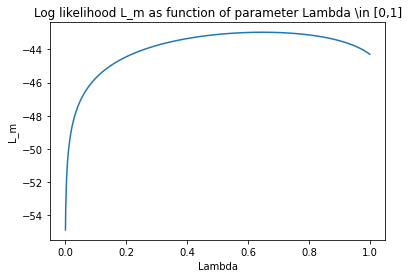

based on the calculation above, maximum value of L_m is: -42.96413720705673
the value of \Lambda where this maximum occurs is: 0.648


In [19]:
# part e solution: plotting the required data for the sentence 'THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE'

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import *

# loading the vocabulary list as a dictionary with the line numbers in the text file 'Vocab' as keys
v=1
vocablist=[]
with open('hw4_vocab.txt') as f:
    for line in f:
        vocablist.append(v)
        vocablist.append(line.strip())
        v=v+1

def Convertlisttodic(lst):     # function to convert a list to dictionary
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct
 
vocabdictwlinekey=Convertlisttodic(vocablist) # creates a dictionary from vocab file with keys as line numbers and words as values 

##unigram
# loading the unigram counts as a dictionary with the line numbers in the text file as keys

v=1
vocabunigramlist=[]
with open('hw4_unigram.txt') as f:
    for line in f:
        vocabunigramlist.append(v)
        vocabunigramlist.append(int(line.strip()))  #takes the counts as integer values 
        v=v+1

unigmdictlinekey=Convertlisttodic(vocabunigramlist) # creates a dictionary from the text file with keys as line numbers and unigram counts as values 


# computing unigram probabilities: 
s1=0    # total count of all the words
for key in unigmdictlinekey.keys():
    s1=s1+unigmdictlinekey[key]

probdictuni={key: (value)/ s1 for key, value in unigmdictlinekey.items()}   
# the last line above creates probabilities/ML estimates from unigram count


def unigramprobcalc(word):
    s=0
    for key, value in vocabdictwlinekey.items():
        if value == word:
            s=1
            break
    if s==0:
        print('the word is not in the unigram count list/vocabulary so unigram probabilty will be 0')
        return 0
    return probdictuni[key]
  
#################################################################
## bigram
# loading the bigram counts as an array : 1st column values in the array are indices for words that appear first 
# and 2nd column values in the array are indices for words that appear next. 3rd column values are numbers of such occurrences

X = pd.read_csv('hw4_bigram.txt', sep="\t", header=None) # reading the table of the file using Pandas

# so our array of bigramcount is :
bigrampairscount=np.array(X.values) #: Note in the array 'bigrampairscount', indexing of rows and columns start from 0

def bitotwordcount(word):     # calculates the total count of a preceeding word (w) in the vocabulary 
    countword=0
    for key, value in vocabdictwlinekey.items():
        if value==word:
            k=key   # this key is unique for each word
            break
    for l in range(len(bigrampairscount[:,0])):
        if  bigrampairscount[l,0]== k:
            countword=countword+bigrampairscount[l,2]
    return countword

# computing total bigram ocuurences for each word that preceedes:  and storing it in a dictionary
bitotfirstword={key: bitotwordcount(value) for key, value in vocabdictwlinekey.items()}   

    
# making a final array of maximal likelihood, bigram probability distribution
# it will store bigram probability P_b(w'|w) where index of w can be found from the first
# row of 'bigrampairscount' and index of w' can be found from second row of that array
# after getting index we get the actual words from the dictionary 'vocabdictwlinekey'.

probdist=np.zeros(len(bigrampairscount[:,0]), dtype=float)

for i in range(len(bigrampairscount[:,0])):
    dummy=bitotfirstword[bigrampairscount[i,0]]
    probdist[i]=bigrampairscount[i,2]/dummy

# this probdist will give us all the probabilities of pairs (w,w') i.e. maximal likelihood P(w'|w)

# if we want to make the probabilities of the pair of words as in the bigram text file then:

bigramprob=np.column_stack((bigrampairscount[:,0:2],probdist))
# -in this last array : 1st column = index of w, second column=index of w'
# 3rd column is P(w'|w)

def findkey(i,j):      # finds the probability of a part w, w' with indices i, j respectively: 
    t=0
    for m in range(len(bigramprob[:,0])):
        if bigramprob[m,0]==i and bigramprob[m,1]==j:
            t=1
            break
    if t==1:
        return m
    else:
        return len(bigramprob[:,0])+5
    

def bigramprobcalc(wordfirst, wordsecond): # calculates P(wordsecond|wordfirst) from bigram data
    s=0
    keyfirst=0
    keysecond=0    #our keys for words start from 1 so 0 is a safe value
    for key, value in vocabdictwlinekey.items():
        if value==wordfirst:
            keyfirst=key
            break
    for key, value in vocabdictwlinekey.items():
        if value==wordsecond:
            keysecond=key
            break
    if keyfirst!=0 and keysecond!=0:
        #assuming uniqueness of a pair in the bigram text file
        f=findkey(keyfirst,keysecond)
        if f !=len(bigramprob[:,0])+5:
            s=bigramprob[f,2]
        
    return s

####################################### Actual calculation of part e of the problem##############

# the sentence : "THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE. "

p1=np.array([unigramprobcalc('THE'),unigramprobcalc('SIXTEEN'),unigramprobcalc('OFFICIALS'),unigramprobcalc('SOLD'),unigramprobcalc('FIRE'), unigramprobcalc('INSURANCE')])

p2=np.array([bigramprobcalc('<s>', 'THE'),bigramprobcalc('THE', 'SIXTEEN'),bigramprobcalc('SIXTEEN', 'OFFICIALS'),bigramprobcalc('OFFICIALS', 'SOLD'),bigramprobcalc('SOLD', 'FIRE'),bigramprobcalc('FIRE', 'INSURANCE')])

el=np.linspace(0.001, 1, num=1000)  # this is the vector of lambda

logprod=np.zeros(len(el))

for i in range(len(el)):
    pm=np.add(el[i]*p1,(1-el[i])*p2)
    prodpm=np.prod(pm)
    logprod[i]=np.log(prodpm)

plt.title(f"Log likelihood L_m as function of parameter Lambda \in [0,1]") 
plt.xlabel(f"Lambda") 
plt.ylabel(f"L_m") 
plt.plot(el,logprod)
plt.show()

print(f"based on the calculation above, maximum value of L_m is: {np.max(logprod)}")
print(f"the value of \Lambda where this maximum occurs is: {el[np.argmax(logprod)]}")
